<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week13%20-%20Clustering/Walkthrough/Clustering_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering

**Goal**: Learn how to use K-means and Hierarchial clustering.

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

#The Dataset
The dataset we're going to use in this walkthrough is the iris one, which contains 3 differents types of irises.</br>
This dataset is composed of the width and length of both the sepal and petal of the irises. We're going clustering according to its length and width.

This dataset is provided in the `sklearn` library and is well known.


 

In [2]:
iris = datasets.load_iris()

In [3]:
print("The different types of irises are:",iris.target_names)
print("They are encoded as:", iris.target)

The different types of irises are: ['setosa' 'versicolor' 'virginica']
They are encoded as: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As you can see, the **iris** dataset is numpy array.<br>

For a better visualization, we're going to transform it into a `pandas dataframe`.</br>
**Hint:** We can use the numpy array as it is for the k-means Clustering.


In [4]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y=pd.DataFrame(iris.target, columns=["Targets"])
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


##K-Means
We're going to use the K-Means provided by the `sklearn` library.<br>
For illustration, we're going to do two Kmeans:

*   K-means with **3 clusters**
*   K-means with **5 clusters**

The one with **5 clusters** is only for illustration, because we know already that there are only 3 differents types of iris in the dataset.




In [6]:
model3=KMeans(n_clusters=3, random_state=0) #3 clusters
model5=KMeans(n_clusters=5, random_state=0) #5 clusters
model3.fit(X)
model5.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In the following two outputs, you're going to find the results of our two K-means.

In [7]:
print(model3.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [8]:
print(model5.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 3 4 4 4 3 4 3 3 4 3 4 3 4 4 3 4 3 4 3 4 4
 4 4 4 4 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 1 4 2 1 1 2 3 2 1 2 1
 1 1 4 1 1 1 2 2 4 1 4 2 4 1 2 4 4 1 2 2 2 1 4 4 2 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


###Graphical Representation
The output (labels) of the K-means can easily be plotted in a 2D representation.<br>
Below, you can find the scatter plot according to `"sepal length (cm)"` by `"sepal width (cm)"` (only two of the four features used).

Text(0.5, 1.0, 'Raw data')

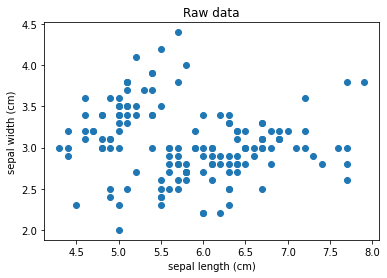

In [9]:
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"])
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Raw data")

Here we're going to visualize how **K-means** performs for the different numbers of clusters.

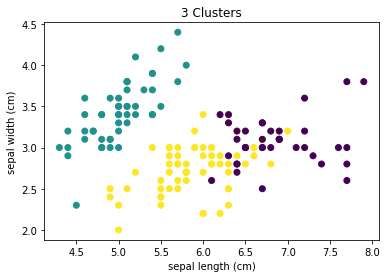

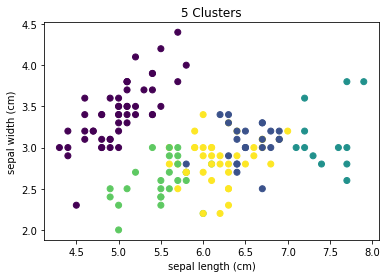

In [10]:
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=model3.labels_)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("3 Clusters")
plt.show()

plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=model5.labels_)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("5 Clusters")
plt.show()

Here we're going to see how the "real" classification looks like. However, usually, we cannot do that because clustering is mostly used without knowing the target variable.

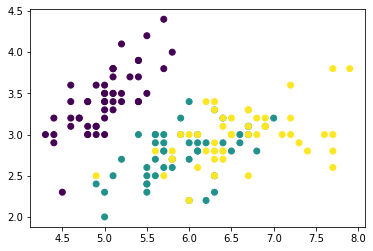

In [11]:
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=y["Targets"])

So if we take our 3 cluster K-means, how accurate is it? To perform this we count the number of matches we have between the labels predicted by the model and the target.

However, we first need to reorder the encoding because it seems that the labels do not match.

| "True" Label | "Model" Label |
| :---: | :---: |
| 0 | 1 |
| 1 | 2 |
| 2 | 0 |

**Note:** Remenber that in the general case we do not have the target variable (unsupervised learning), meaning that we cannot compute the accuracy (ratio of correct over total predictions). Therefore, other metrics like the inertia are used to evaluate the model.

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
model3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
reordered_target = np.zeros(len(iris.target))        #put 0 everywhere 
reordered_target[np.where(iris.target==0)[0]] = 1    #put 1 where the iris.target = 0
reordered_target[np.where(iris.target==1)[0]] = 2    #put 2 where the iris.target = 1
reordered_target[np.where(iris.target==2)[0]] = 0    #put 0 where the iris.target = 2
reordered_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# how accurate are the k-means labels
sum([1 if x else 0 for x in (model3.labels_ == reordered_target)]) / len(model3.labels_)

0.8933333333333333

##Elbow method
We will now apply the **K-means** algorithm to estimate the number of clusters. For this, we will use the **The Elbow Method** ([further reading](https://en.wikipedia.org/wiki/Elbow_method_(clustering))).  

This method consists in plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve (**inertia**) as the number of clusters to use. The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters). However, this will at some point result in **over-fitting**, which the elbow reflects. 

Using the KMeans module from sklearn, we will iteratively apply the K-means algorithm, save the parameter `inertia_` (i.e sum of squared distances of samples to their closest cluster center). Then plot the inertia compared to the number of clusters. Knowing that the elbow method tells us to select the cluster when there is a significant change in inertia, find the possible elbow point (possible number of cluster).

How many clusters could you use now?

Text(0, 0.5, 'Inertia')

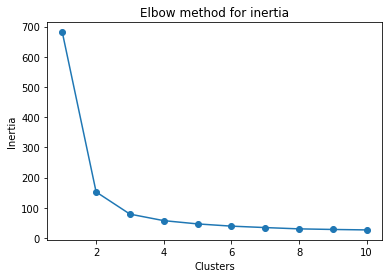

In [16]:
inertias = []
nbr_clusters = range(1,11)

for i in nbr_clusters:
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(nbr_clusters, inertias, '-o')
plt.title('Elbow method for inertia')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

## Hierarchial clustering
We're going to use the `AgglomerativeClustering` function provided by the `sklearn` library. This will help us do the hierarchial clustering<br>


In [17]:
from sklearn.cluster import AgglomerativeClustering

Below, we're going to creat and fit the model.

In [18]:
clustering3 = AgglomerativeClustering(n_clusters=3)
clustering3.fit(X, y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

Like before, we take a look at the "reponse" the model gave us and the original ones.

In [19]:
clustering3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As we can see, the encoding of our Hierachical clustering is not the same as the original target.<br>
In order to compar them, we're going to reorder the `iris.target`.

| "True" label | "Model" label |
| :---: | :---: |
| 0 | 1 |
| 1 | 0 |
| 2 | 2 |

In [21]:
reordered_target = np.zeros(len(iris.target))        #put 0 everywhere 
reordered_target[np.where(iris.target==0)[0]] = 1    #put 1 where the iris.target = 0
reordered_target[np.where(iris.target==2)[0]] = 2    #put 2 where the iris.target = 2
reordered_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Here we can see that the final result is the same as the one of the K-means. Therefore, it comes to no surprize that the accuracy is the same.

In [22]:
sum([1 if x else 0 for x in (clustering3.labels_ == reordered_target)]) / len(clustering3.labels_)

0.8933333333333333

## Runtime of both Clustering Types
Here we want to see the computation time needed for the **Kmeans** and the **Hierarchial** clusterings.

For this we use `%%time` which will provide the computation time.



In [23]:
%%time
clustering3 = AgglomerativeClustering(n_clusters=3)
clustering3.fit(X, y)

CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 2.94 ms


In [24]:
%%time
model3=KMeans(n_clusters=3)
model3.fit(X)

CPU times: user 40.6 ms, sys: 0 ns, total: 40.6 ms
Wall time: 43.9 ms


**Note:** This dataset is small (150 observations), which is why kmeans takes longer than hierarchical clustering. However, generally, hierarchical clustering takes much longer than kmeans, which you will experience in the exercise.

###Dendogram visualization

In this section, we're going to present a simple way to create a **Dendogram**.<br>
To do it, we're going to use the `scipy.cluster.hierarchy` library. In this library, we're going to use: 


*   `dendogram`: It allow us to plot the dendogram.
*   `linkage`: It allows us to specify the type of linkage between the cluster. 

![Texte alternatif…](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png)


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering

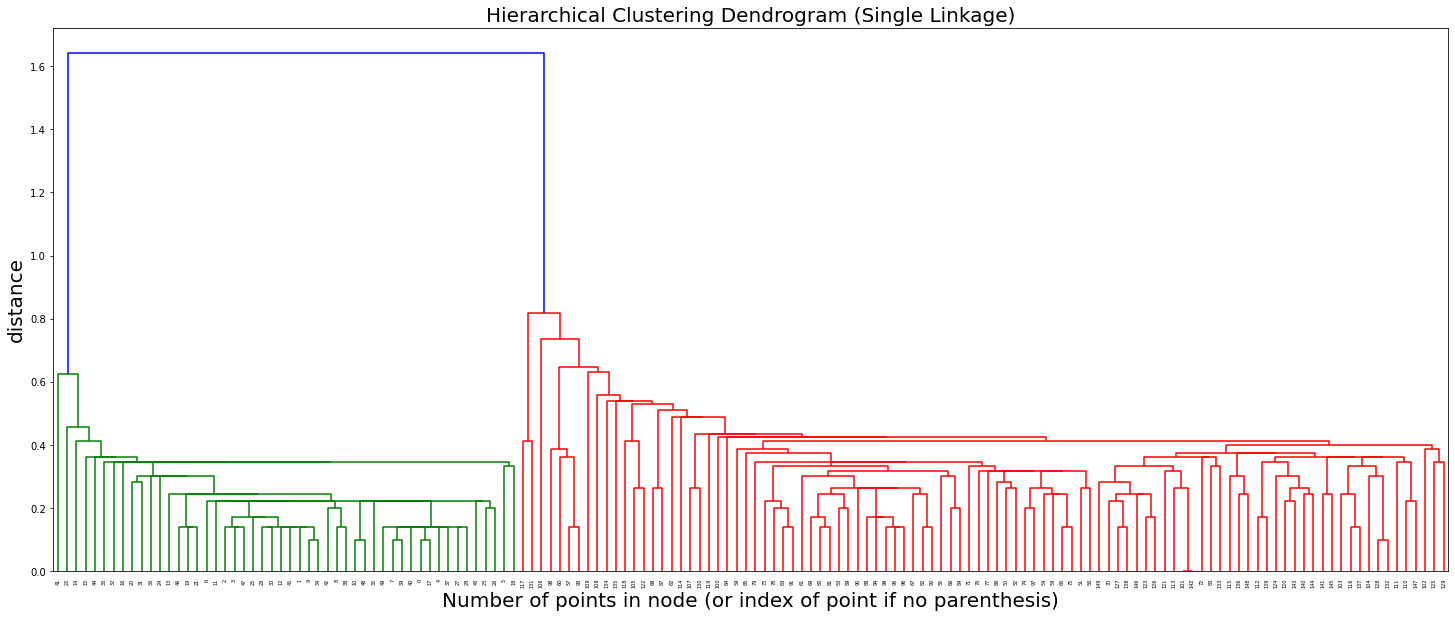

In [26]:
# Single linkage

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'single') #Provide the type of linkage we want.
dendrogram(Z) #compute the dendogram according the linkage

plt.show()

###Exercise
Plot the 3 other types of linkages and look at what is changing.

In [ ]:
# Average linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'...') #something here
dendrogram(Z)

plt.show()

In [ ]:
# Complete linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'...') #something here
dendrogram(Z)

plt.show()

In [ ]:
# Ward linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'...') #something here
dendrogram(Z)

plt.show()